In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [4]:
df.isna().sum()

Month          0
#Passengers    0
dtype: int64

In [5]:
df['Month']=pd.to_datetime(df['Month'],format='%Y-%m')
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [6]:
df.set_index('Month',inplace=True)
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [7]:
X=df.values

In [8]:
train=X[:120]
test=X[120:]
train.shape,test.shape

((120, 1), (24, 1))

In [10]:
import itertools
p=d=q=range(0,9)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (0, 7, 8),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0, 8, 3),
 (0, 8, 4),
 (0, 8, 5),
 (0, 8, 6),
 (0, 8, 7),
 (0, 8, 8),
 (1, 0, 0),
 (1, 0, 1),
 (1,

In [11]:
from statsmodels.tsa.arima_model import ARIMA

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
for param in pdq:
    try:
        arima=ARIMA(train,order=param)
        arima_fit=arima.fit()
        print(param,arima_fit.aic)
    except:
        continue

(0, 0, 0) 1436.325161466474
(0, 0, 1) 1295.4218464762516
(0, 1, 0) 1140.2919914719546
(0, 1, 1) 1128.6684629692888
(0, 1, 2) 1128.350229670913
(0, 1, 3) 1113.8897386927988
(0, 1, 4) 1095.3054620665398
(0, 1, 5) 1092.9113101453963
(0, 1, 6) 1086.007295157036
(0, 1, 7) 1088.6080574750645
(0, 2, 0) 1173.6434396571892
(0, 2, 1) 1138.4614646857087
(0, 2, 2) 1126.3530963706687
(0, 2, 3) 1126.5559490043681
(1, 0, 0) 1152.3962876278088
(1, 0, 1) 1138.851790073043
(1, 0, 2) 1140.240458261792
(1, 0, 3) 2103.916068162226
(1, 0, 4) 1928.521986017361
(1, 0, 5) 1129.0008638081035
(1, 0, 6) 1112.7463679840353
(1, 1, 0) 1132.3361058957166
(1, 1, 1) 1130.437568134158
(1, 1, 2) 1106.7813438079634
(1, 1, 3) 1108.394374122965
(1, 1, 4) 1096.6589091775882
(1, 1, 5) 1086.5817625438349
(1, 1, 6) 1087.2596969933743
(1, 1, 7) 1074.4759929996603
(1, 1, 8) 1075.0933163334028
(1, 2, 0) 1170.210702069385
(1, 2, 2) 1124.8855170129443
(1, 2, 3) 1125.6552375333968
(1, 2, 4) 1127.6167608355127
(1, 2, 5) 1100.334159289

In [ ]:
117 1074
417 1057
717 1034

In [22]:

model=ARIMA(train,order=(7,1,7))
model_fit=model.fit()
model_fit.aic

1034.895936220523

In [23]:
predictions=model_fit.forecast(steps=24)[0]
predictions

array([368.98308583, 339.83995473, 341.91878865, 350.01630831,
       390.81465343, 478.78192918, 533.25498981, 493.81910998,
       442.80236144, 384.69583611, 348.4722959 , 374.92715471,
       394.48209583, 361.91249771, 353.61061751, 371.07006395,
       415.11224086, 506.24552997, 557.916735  , 518.86485246,
       466.23534228, 418.08301111, 386.51420538, 410.17049229])

In [24]:
test

array([[360],
       [342],
       [406],
       [396],
       [420],
       [472],
       [548],
       [559],
       [463],
       [407],
       [362],
       [405],
       [417],
       [391],
       [419],
       [461],
       [472],
       [535],
       [622],
       [606],
       [508],
       [461],
       [390],
       [432]], dtype=int64)

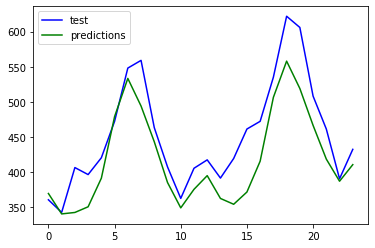

In [28]:

plt.plot(test,color='blue',label='test')
plt.plot(predictions,color='green',label='predictions')
plt.legend()